In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the CSV file 
file_path = 'song_data.csv'
df = pd.read_csv(file_path)

X = df[['song_duration_ms', 'acousticness', 'danceability', 'energy', 
        'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 
        'audio_valence']]

y = df['song_popularity']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=42)

# Create polynomial features 
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create linear regression model
model = LinearRegression()

In [6]:
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

Mean Absolute Error: 17.79396936738929
Mean Squared Error: 1235.659472355967
Root Mean Squared Error: 35.151948343668906


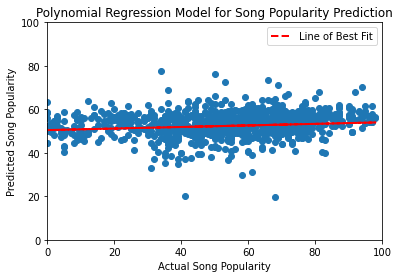

In [7]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Song Popularity')
plt.ylabel('Predicted Song Popularity')
plt.title('Polynomial Regression Model for Song Popularity Prediction')

plt.xlim(0, 100)
plt.ylim(0, 100)

# Add a line of best fit
coefficients = np.polyfit(y_test, y_pred, 1)
line = np.poly1d(coefficients)

plt.plot(y_test, line(y_test), color='red', linestyle='--', linewidth=2, label='Line of Best Fit')

plt.legend()
plt.show()